# Question 1 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

In [2]:
import pandas as pd
import numpy as np


### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [24]:

df = pd.read_csv(r"C:\Users\durba\Downloads\segmentation data.csv")

In [5]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [25]:
## drop unwanted columns
df = df.drop(columns=['ID'])
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [26]:
## check for null values 
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [30]:
#categorizing according to age
'''The Silent Generation: Born 1928-1945.
Baby Boomers: Born 1946-1964.
Generation X: Born 1965-1980.
Millennials: Born 1981-1996.
Generation Z: Born 1997-2012'''
def categorize_age(age):
    if(60<=age<=75):
        return 'Baby Boomers'
    elif ( 40<=age<60):
        return 'Generation X'
    elif(28<=age<40):
        return 'Millennials'
    else:
        return 'Generation Z'
    
df['Age Group'] = df['Age'].apply(lambda x: categorize_age(x))

df.tail()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age Group
1995,1,0,47,1,123525,0,0,Generation X
1996,1,1,27,1,117744,1,0,Generation Z
1997,0,0,31,0,86400,0,0,Millennials
1998,1,1,24,1,97968,0,0,Generation Z
1999,0,0,25,0,68416,0,0,Generation Z


In [31]:
#Scale the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lst = ['Age','Income',]
df[lst]=scaler.fit_transform(df[lst])
print(df['Age'])

0       2.653614
1      -1.187132
2       1.117316
3       0.775916
4       1.458716
          ...   
1995    0.946616
1996   -0.760382
1997   -0.418983
1998   -1.016432
1999   -0.931082
Name: Age, Length: 2000, dtype: float64


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop the 'Age Group' column before clustering if it's in the DataFrame
df_cluster = df.drop(columns=['Age Group'])

k_values = range(2, 11)

inertia_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    
    # Inertia score
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)
    
    # Silhouette score
    silhouette_avg = silhouette_score(df_cluster, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    print(f'For n_clusters = {k}, Inertia: {inertia}, Silhouette Score: {silhouette_avg}')


For n_clusters = 2, Inertia: 5535.85485507024, Silhouette Score: 0.2902082458291776
For n_clusters = 3, Inertia: 4466.6407227375075, Silhouette Score: 0.2516768222381715
For n_clusters = 4, Inertia: 4029.49498501547, Silhouette Score: 0.20594236318058762
For n_clusters = 5, Inertia: 3520.4107449986786, Silhouette Score: 0.21322926928519326
For n_clusters = 6, Inertia: 3266.2966950895548, Silhouette Score: 0.21562412922536012
For n_clusters = 7, Inertia: 3033.9879701023215, Silhouette Score: 0.21591355976267107
For n_clusters = 8, Inertia: 2784.3899528404686, Silhouette Score: 0.22801614360661243
For n_clusters = 9, Inertia: 2575.2802317154874, Silhouette Score: 0.23743511002956075
For n_clusters = 10, Inertia: 2401.133544059562, Silhouette Score: 0.25449261171416837


C:\Users\durba\AppData\Local\Temp\ipykernel_2192\994549956.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_values, inertia_scores, 'bo-', color='red')
C:\Users\durba\AppData\Local\Temp\ipykernel_2192\994549956.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_values, silhouette_scores, 'bo-', color='blue')


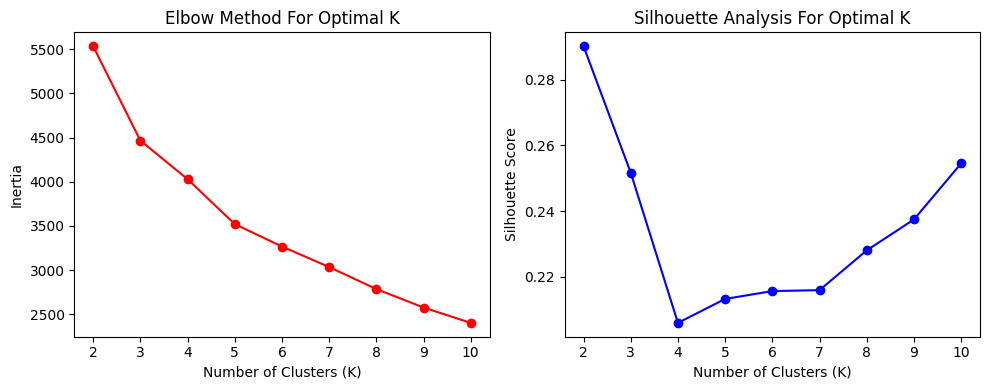

In [35]:
import matplotlib.pyplot as plt

# Plot Inertia
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_scores, 'bo-', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'bo-', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')

plt.tight_layout()
plt.show()


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(df_cluster)

labels = kmeans.labels_
inertia = kmeans.inertia_

silhouette_avg = silhouette_score(df_cluster, labels)

print(f'Inertia for K=4: {inertia}')
print(f'Silhouette Score for K=4: {silhouette_avg}')

Inertia for K=4: 4029.49498501547
Silhouette Score for K=4: 0.20594236318058762


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.